<a href="https://colab.research.google.com/github/adi271001/Techfest-IIT-Bombay-Projects/blob/main/PGM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE REQUIRED 

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import keras 

LOADING AND SPLITTING THE DATA 

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


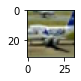

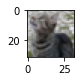

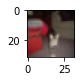

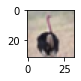

In [ ]:

for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()
    

PREPROCESSING THE DATA 

In [ ]:


X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255
n_classes = 10


print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL 

In [ ]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 21s 24ms/step - loss: 1.6398 - accuracy: 0.3959 - val_loss: 1.2141 - val_accuracy: 0.5656
Epoch 2/10
391/391 [==============================] - 9s 22ms/step - loss: 1.1656 - accuracy: 0.5838 - val_loss: 0.9349 - val_accuracy: 0.6735
Epoch 3/10
391/391 [==============================] - 9s 23ms/step - loss: 0.9559 - accuracy: 0.6630 - val_loss: 0.8568 - val_accuracy: 0.7049
Epoch 4/10
391/391 [==============================] - 9s 23ms/step - loss: 0.8420 - accuracy: 0.7042 - val_loss: 0.7744 - val_accuracy: 0.7305
Epoch 5/10
391/391 [==============================] - 9s 22ms/step - loss: 0.7580 - accuracy: 0.7341 - val_loss: 0.7336 - val_accuracy: 0.7493
Epoch 6/10
391/391 [==============================] - 9s 22ms/step - loss: 0.6882 - accuracy: 0.7612 - val_loss: 0.6943 - val_accuracy: 0.7589
Epoch 7/10
391/391 [==============================] - 9s 23ms/step - loss: 0.6309 - accuracy: 0.7784 - val_loss: 0.6989 - val_accuracy: 0.760

PREDICTING 

In [ ]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 173ms/step


In [ ]:
print (predictions)

[[8.96287165e-05 5.17334865e-06 1.49222380e-02 6.66916184e-03
  5.71091115e-01 3.04747522e-02 2.79361091e-04 3.76388192e-01
  4.91744468e-05 3.11539116e-05]
 [3.33851523e-04 3.71247988e-05 9.80404317e-02 1.36513144e-01
  2.37788279e-02 6.67687774e-01 3.61818634e-02 3.62834781e-02
  1.02044432e-03 1.23103688e-04]
 [1.54876234e-05 6.95431891e-06 3.23528191e-03 2.52456125e-03
  7.13263435e-05 3.55014083e-04 9.93701458e-01 2.07240078e-06
  7.23450357e-05 1.55393591e-05]
 [1.02316844e-05 6.44276383e-07 2.35612015e-03 7.67741740e-01
  1.87887959e-02 5.62637532e-03 2.05421016e-01 2.38643897e-05
  1.22406791e-05 1.89265611e-05]
 [2.85602539e-07 9.99624133e-01 1.99556734e-13 1.53455612e-12
  1.37573634e-14 1.10920891e-15 1.96814966e-14 4.21885861e-13
  5.68954874e-06 3.69958812e-04]
 [4.69505252e-08 9.99813855e-01 1.26506739e-11 1.09995910e-11
  6.19670534e-14 7.27722427e-15 9.17775439e-11 2.92909922e-14
  1.83090669e-04 3.06597235e-06]
 [2.43554786e-02 6.89799339e-03 4.72324453e-02 3.70868027e

In [ ]:
for image in predictions:
    print(np.sum(image))

0.99999994
1.0000001
1.0000001
0.99999994
1.0
1.0000001
1.0
0.9999999
0.99999994


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 6 6 8]


FINAL OBJECT DETECTION 

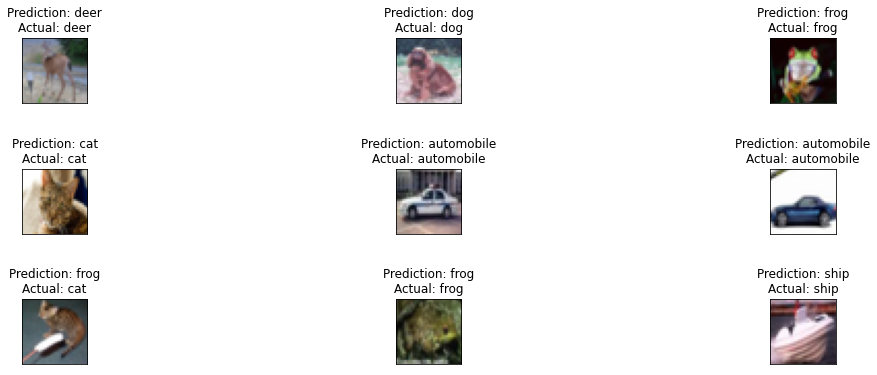

In [ ]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()